# ML Algorithms Crash Course

## **Cross Validation**
- **Cross Validation**: A technique used to evaluate the performance of a machine learning model by training and testing it on multiple subsets of the data.
- **K-Fold Cross Validation**: The training set is split into $k$ smaller sets. The model is trained on $k-1$ of the folds and tested on the remaining fold. This process is repeated $k$ times, with each of the $k$ folds used exactly once as the validation data.
- **Leave-One-Out Cross Validation (LOOCV)**: A special case of $k$-fold cross-validation where $k$ is equal to the number of instances in the dataset.



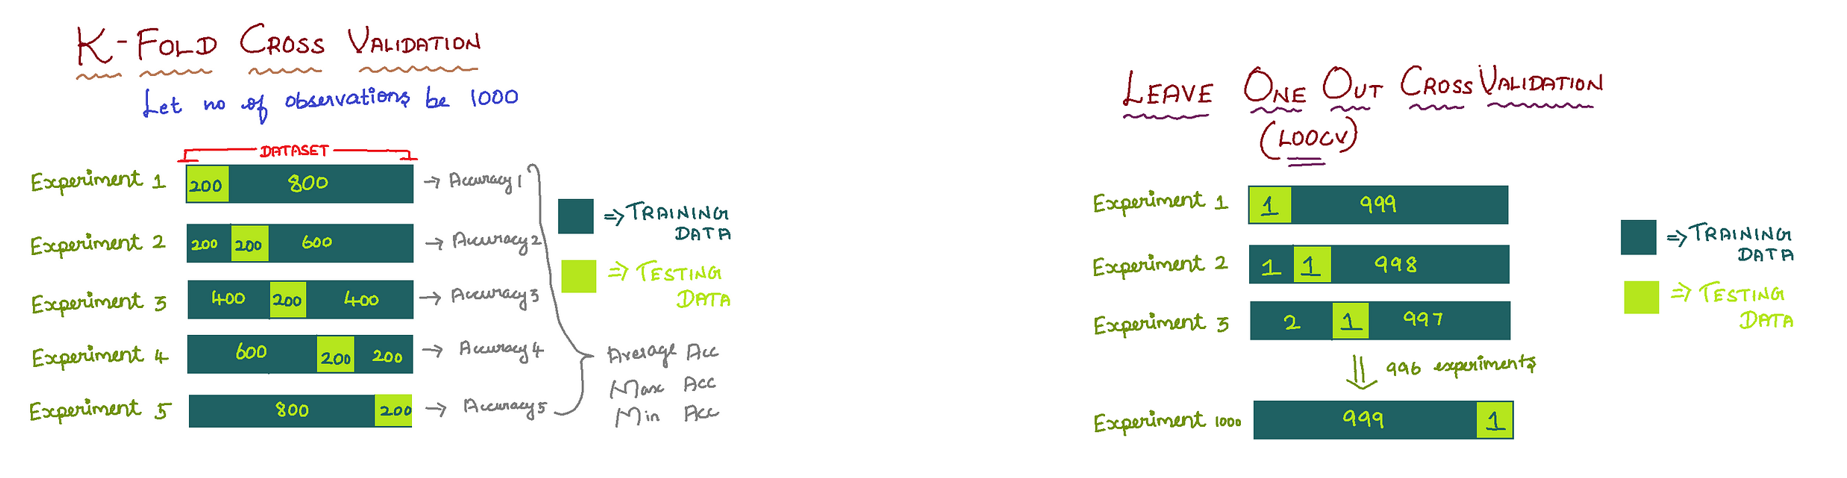

In [175]:
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
scores

array([0.92105263, 0.93859649, 0.98245614, 0.98245614, 0.97345133])

In [178]:
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['model', 'mean accuracy', 'std dev', 'scores']

models = {'Logistic Regression': LogisticRegression(max_iter=10_000),
          'SVM': SVC(),
          'KNN': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier()}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    table.add_row([name, round(scores.mean(),3), round(scores.std(),3), scores])

print(table)


+---------------------+---------------+---------+----------------------------------------------------------+
|        model        | mean accuracy | std dev |                          scores                          |
+---------------------+---------------+---------+----------------------------------------------------------+
| Logistic Regression |     0.951     |  0.018  | [0.93859649 0.94736842 0.98245614 0.92982456 0.95575221] |
|         SVM         |     0.912     |  0.035  | [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ] |
|         KNN         |     0.928     |  0.022  | [0.88596491 0.93859649 0.93859649 0.94736842 0.92920354] |
|    Decision Tree    |     0.917     |  0.011  | [0.9122807  0.90350877 0.92982456 0.92982456 0.91150442] |
|    Random Forest    |     0.963     |  0.017  | [0.93859649 0.94736842 0.98245614 0.97368421 0.97345133] |
+---------------------+---------------+---------+----------------------------------------------------------+


In [173]:
100/10

10.0

In [179]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['model', 'mean accuracy', 'std dev', 'scores']

loo = LeaveOneOut()

models = {'Logistic Regression': LogisticRegression(max_iter=10_000),
          'SVM': SVC(),
          'KNN': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier()}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')

    table.add_row([name, round(scores.mean(),3), round(scores.std(),3), scores])

print(table)


+---------------------+---------------+---------+--------------------------------------------------------------------------+
|        model        | mean accuracy | std dev |                                  scores                                  |
+---------------------+---------------+---------+--------------------------------------------------------------------------+
| Logistic Regression |     0.954     |  0.209  | [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. |
|                     |               |         |  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. |
|                     |               |         |  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. |
|                     |               |         |  1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. |
|                     |               |         |  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. |


## **Hyperparameter Tuning**
- **Hyperparameter Tuning**: The process of finding the best hyperparameters for a machine learning model.
- **Grid Search**: A technique used to search for the best hyperparameters by evaluating the model performance for each combination of hyperparameters in a grid.
- **Random Search**: A technique used to search for the best hyperparameters by evaluating the model performance for a fixed number of random hyperparameter combinations.


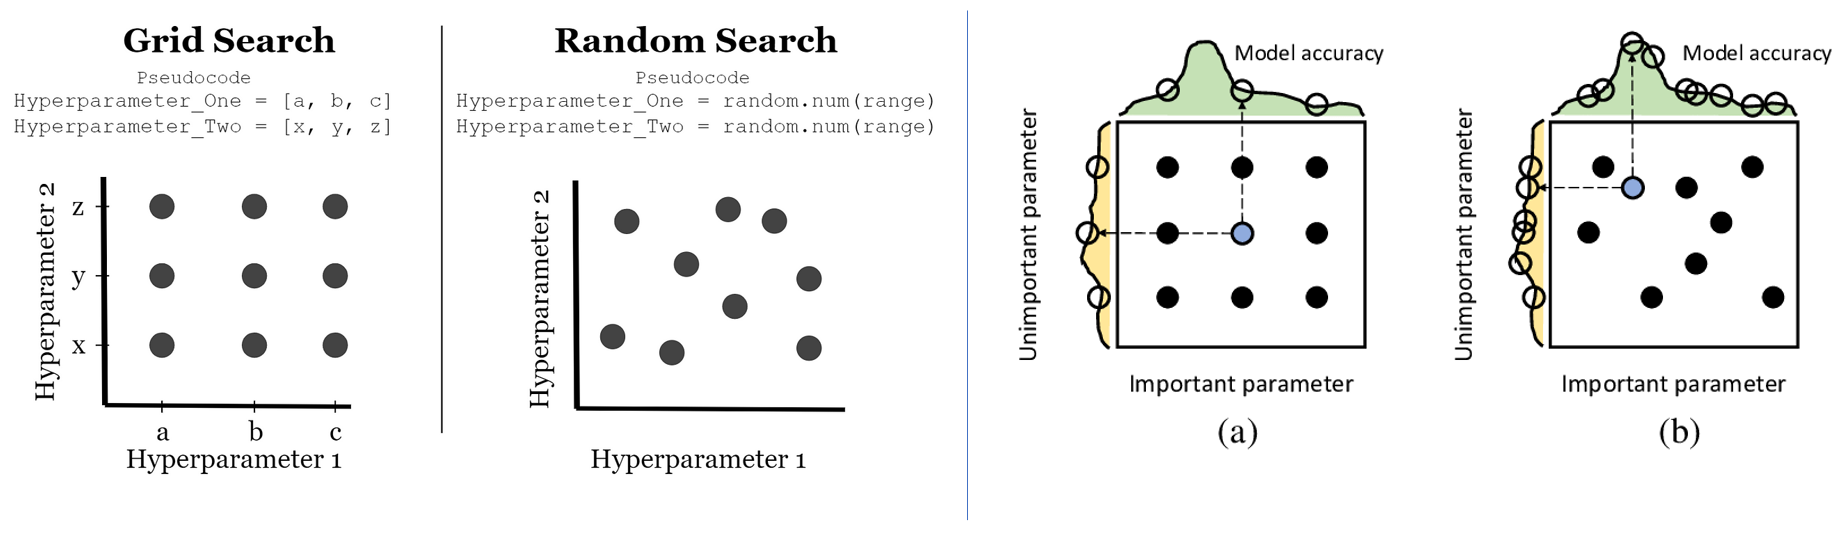

In [ ]:
max_depth = [3,4,5,6]
min_impurity_decrease= [0, 0.01, 0.05, 0.1]
max_leaf_nodes=[3,4,5,6,7]



In [182]:
from sklearn.model_selection import GridSearchCV

table = PrettyTable(field_names=['model', 'best parameters', 'best score'])

param_grid = {'Logistic Regression': {
                        'model': LogisticRegression(max_iter=10_000),
                        'params': {'C': [0.1, 1, 10]}},

                'SVM': {
                    'model': SVC(),
                    'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
                },

                'KNN': {
                    'model': KNeighborsClassifier(),
                    'params': {'n_neighbors':[3, 5, 8]}
                },

                'Decision Tree': {
                    'model': DecisionTreeClassifier(),
                    'params': {'max_depth': [3,4,5,6], 
                               'min_impurity_decrease':[0, 0.01, 0.05, 0.1],
                               'max_leaf_nodes':[3,4,5,6,7]}
                },

                'Random Forest': {
                    'model': RandomForestClassifier(n_jobs=-1),
                    'params': {'max_depth': [3,4,5], 
                               'min_impurity_decrease':[0, 0.01, 0.05],
                               'max_leaf_nodes':[3,4,5],
                               'n_estimators': [50, 100, 500]}
                },


          }


for name, parm in param_grid.items():
    grid_search = GridSearchCV(parm['model'], parm['params'], cv=5, scoring='accuracy')

    grid_search.fit(X,y)

    table.add_row([name, grid_search.best_params_, round(grid_search.best_score_, 3)])


print(table)


+---------------------+-------------------------------------------------------------------------------------------+------------+
|        model        |                                      best parameters                                      | best score |
+---------------------+-------------------------------------------------------------------------------------------+------------+
| Logistic Regression |                                         {'C': 10}                                         |   0.953    |
|         SVM         |                               {'C': 10, 'kernel': 'linear'}                               |   0.953    |
|         KNN         |                                     {'n_neighbors': 5}                                    |   0.928    |
|    Decision Tree    |             {'max_depth': 3, 'max_leaf_nodes': 4, 'min_impurity_decrease': 0}             |   0.937    |
|    Random Forest    | {'max_depth': 3, 'max_leaf_nodes': 4, 'min_impurity_decrease': 0.01, 'n_e

In [183]:
# help(SVC)

In [184]:
# randomized grid search cross validation

from sklearn.model_selection import RandomizedSearchCV

table = PrettyTable(field_names=['model', 'best parameters', 'best score'])


for name, parm in param_grid.items():
    grid_search = RandomizedSearchCV(parm['model'], parm['params'], cv=5, scoring='accuracy', n_iter=5)

    grid_search.fit(X,y)

    table.add_row([name, grid_search.best_params_, round(grid_search.best_score_, 3)])


print(table)

c:\Users\laxmi\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\laxmi\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


+---------------------+-------------------------------------------------------------------------------------------+------------+
|        model        |                                      best parameters                                      | best score |
+---------------------+-------------------------------------------------------------------------------------------+------------+
| Logistic Regression |                                         {'C': 10}                                         |   0.953    |
|         SVM         |                               {'kernel': 'linear', 'C': 10}                               |   0.953    |
|         KNN         |                                     {'n_neighbors': 5}                                    |   0.928    |
|    Decision Tree    |             {'min_impurity_decrease': 0, 'max_leaf_nodes': 4, 'max_depth': 4}             |   0.935    |
|    Random Forest    | {'n_estimators': 500, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': 5,